In [1]:
# Import required libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, LabelEncoder, StandardScaler, MinMaxScaler, RobustScaler

# Load the dataset
df = pd.read_csv("athlete_events.csv")

# Display first few rows
print("Dataset Preview:")
print(df.head())

Dataset Preview:
   ID                      Name Sex   Age  Height  Weight            Team  \
0   1                 A Dijiang   M  24.0   180.0    80.0           China   
1   2                  A Lamusi   M  23.0   170.0    60.0           China   
2   3       Gunnar Nielsen Aaby   M  24.0     NaN     NaN         Denmark   
3   4      Edgar Lindenau Aabye   M  34.0     NaN     NaN  Denmark/Sweden   
4   5  Christine Jacoba Aaftink   F  21.0   185.0    82.0     Netherlands   

   NOC        Games  Year  Season       City          Sport  \
0  CHN  1992 Summer  1992  Summer  Barcelona     Basketball   
1  CHN  2012 Summer  2012  Summer     London           Judo   
2  DEN  1920 Summer  1920  Summer  Antwerpen       Football   
3  DEN  1900 Summer  1900  Summer      Paris     Tug-Of-War   
4  NED  1988 Winter  1988  Winter    Calgary  Speed Skating   

                              Event Medal  
0       Basketball Men's Basketball   NaN  
1      Judo Men's Extra-Lightweight   NaN  
2        

In [2]:
# Check dataset structure and data types
print("\nDataset Information:")
print(df.info())



Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 271116 entries, 0 to 271115
Data columns (total 15 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   ID      271116 non-null  int64  
 1   Name    271116 non-null  object 
 2   Sex     271116 non-null  object 
 3   Age     261642 non-null  float64
 4   Height  210945 non-null  float64
 5   Weight  208241 non-null  float64
 6   Team    271116 non-null  object 
 7   NOC     271116 non-null  object 
 8   Games   271116 non-null  object 
 9   Year    271116 non-null  int64  
 10  Season  271116 non-null  object 
 11  City    271116 non-null  object 
 12  Sport   271116 non-null  object 
 13  Event   271116 non-null  object 
 14  Medal   39783 non-null   object 
dtypes: float64(3), int64(2), object(10)
memory usage: 31.0+ MB
None


In [3]:
# Check for missing values
print("\nMissing Values Count:")
print(df.isnull().sum())



Missing Values Count:
ID             0
Name           0
Sex            0
Age         9474
Height     60171
Weight     62875
Team           0
NOC            0
Games          0
Year           0
Season         0
City           0
Sport          0
Event          0
Medal     231333
dtype: int64


In [5]:
# Identify columns with missing values
missing_values = df.isnull().sum()
missing_values = missing_values[missing_values > 0]
print("Missing Values per Column:\n", missing_values)

# Impute numerical columns with median
num_cols = df.select_dtypes(include=['float64', 'int64']).columns
imputer_num = SimpleImputer(strategy="median")
df[num_cols] = imputer_num.fit_transform(df[num_cols])

# Impute categorical columns with most frequent value (mode)
cat_cols = df.select_dtypes(include=['object']).columns
imputer_cat = SimpleImputer(strategy="most_frequent")
df[cat_cols] = imputer_cat.fit_transform(df[cat_cols])

# Verify missing values are handled
print("\nMissing values after imputation:\n", df.isnull().sum())

Missing Values per Column:
 Age         9474
Height     60171
Weight     62875
Medal     231333
dtype: int64

Missing values after imputation:
 ID        0
Name      0
Sex       0
Age       0
Height    0
Weight    0
Team      0
NOC       0
Games     0
Year      0
Season    0
City      0
Sport     0
Event     0
Medal     0
dtype: int64


In [4]:
# Summary statistics
print("\nSummary Statistics:")
print(df.describe())


Summary Statistics:
                  ID            Age         Height         Weight  \
count  271116.000000  261642.000000  210945.000000  208241.000000   
mean    68248.954396      25.556898     175.338970      70.702393   
std     39022.286345       6.393561      10.518462      14.348020   
min         1.000000      10.000000     127.000000      25.000000   
25%     34643.000000      21.000000     168.000000      60.000000   
50%     68205.000000      24.000000     175.000000      70.000000   
75%    102097.250000      28.000000     183.000000      79.000000   
max    135571.000000      97.000000     226.000000     214.000000   

                Year  
count  271116.000000  
mean     1978.378480  
std        29.877632  
min      1896.000000  
25%      1960.000000  
50%      1988.000000  
75%      2002.000000  
max      2016.000000  


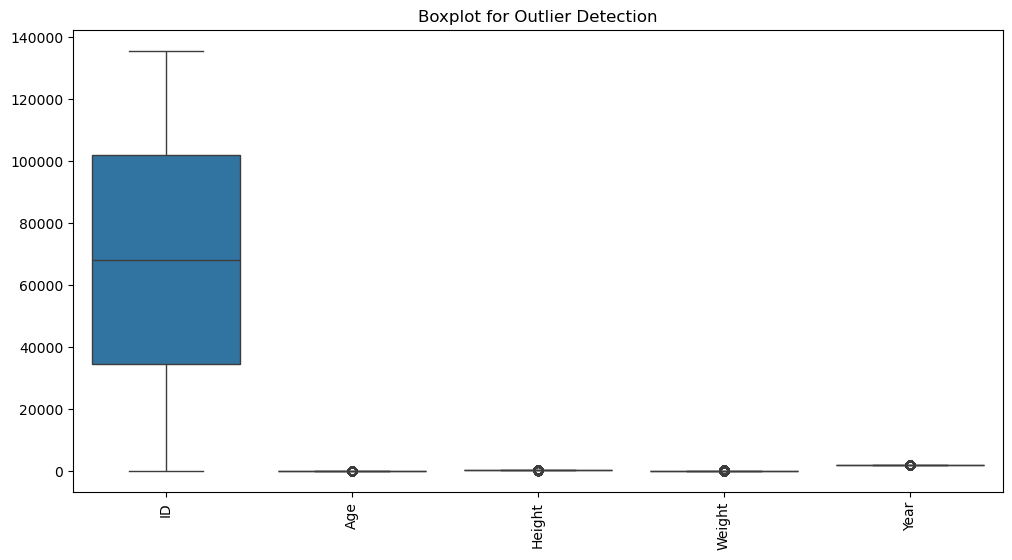

Shape before outlier removal: (271116, 15)
Shape after outlier removal: (238878, 15)


In [6]:
# Outlier detection using box plots
plt.figure(figsize=(12,6))
sns.boxplot(data=df[num_cols])
plt.title("Boxplot for Outlier Detection")
plt.xticks(rotation=90)
plt.show()

# Outlier removal using IQR
Q1 = df[num_cols].quantile(0.25)
Q3 = df[num_cols].quantile(0.75)
IQR = Q3 - Q1

# Define upper and lower bounds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Remove outliers
df_no_outliers = df[~((df[num_cols] < lower_bound) | (df[num_cols] > upper_bound)).any(axis=1)]
print("Shape before outlier removal:", df.shape)
print("Shape after outlier removal:", df_no_outliers.shape)

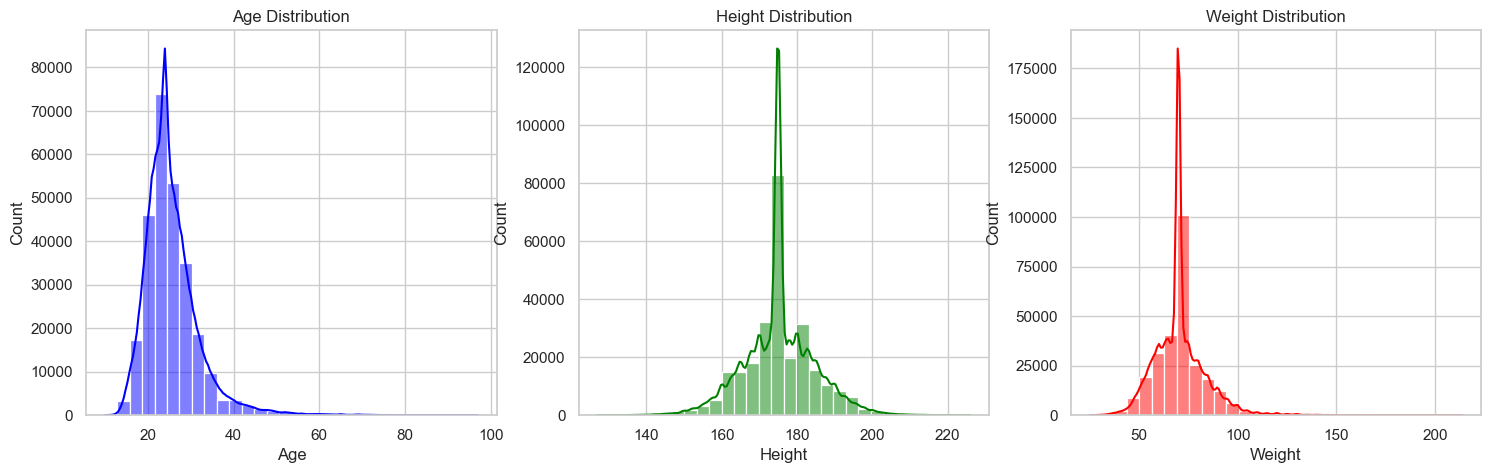

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the style for seaborn
sns.set(style="whitegrid")

# Create subplots for Age, Height, and Weight distributions
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# Age distribution
sns.histplot(df["Age"].dropna(), bins=30, kde=True, ax=axes[0], color="blue")
axes[0].set_title("Age Distribution")

# Height distribution
sns.histplot(df["Height"].dropna(), bins=30, kde=True, ax=axes[1], color="green")
axes[1].set_title("Height Distribution")

# Weight distribution
sns.histplot(df["Weight"].dropna(), bins=30, kde=True, ax=axes[2], color="red")
axes[2].set_title("Weight Distribution")

plt.show()


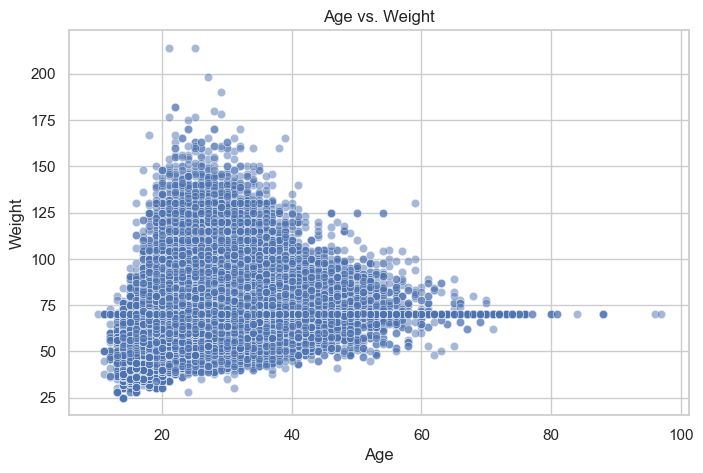

In [8]:
plt.figure(figsize=(8,5))
sns.scatterplot(x=df['Age'], y=df['Weight'], alpha=0.5)
plt.title("Age vs. Weight")
plt.xlabel("Age")
plt.ylabel("Weight")
plt.show()

In [ ]:
# Scatter plot for Height vs. Weight with trend line
plt.figure(figsize=(8, 6))
sns.scatterplot(x=df["Height"], y=df["Weight"], alpha=0.5)
sns.regplot(x=df["Height"], y=df["Weight"], scatter=False, color="red")
plt.title("Height vs. Weight")
plt.xlabel("Height (cm)")
plt.ylabel("Weight (kg)")
plt.show()


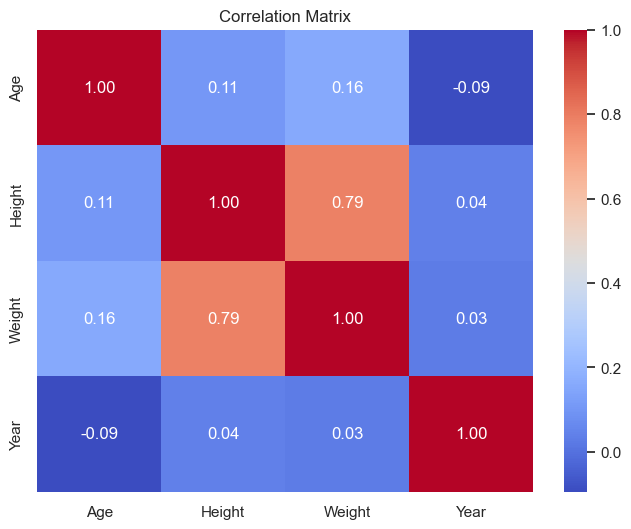

In [10]:
# Compute the correlation matrix for numerical variables
correlation_matrix = df[["Age", "Height", "Weight", "Year"]].corr()

# Plot heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Matrix")
plt.show()


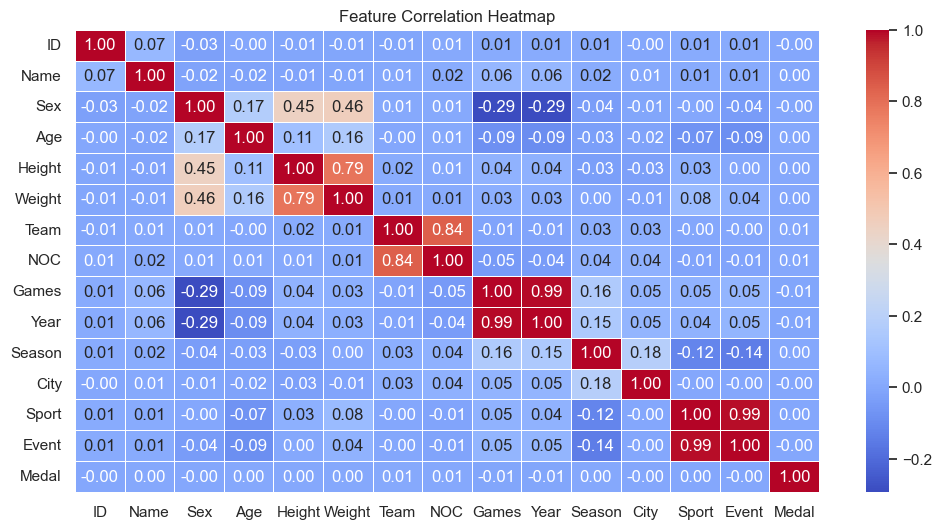

In [11]:
# Convert categorical variables into numerical values before correlation
from sklearn.preprocessing import LabelEncoder

categorical_cols = df.select_dtypes(include=['object']).columns
for col in categorical_cols:
    df[col] = LabelEncoder().fit_transform(df[col])

# Plot heatmap
plt.figure(figsize=(12, 6))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Feature Correlation Heatmap")
plt.show()

In [12]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder

# Encode categorical target variable (Medal: Gold, Silver, Bronze -> 1, else 0)
df["Medal"] = df["Medal"].fillna("No Medal")  # Fill NaN values
label_encoder = LabelEncoder()
df["Medal_encoded"] = label_encoder.fit_transform(df["Medal"].astype(str))

# Selecting numerical features for correlation analysis
numeric_features = ["Age", "Height", "Weight", "Year"]
correlation_with_medal = df[numeric_features + ["Medal_encoded"]].corr()["Medal_encoded"].drop("Medal_encoded")

# Train a Random Forest model to get feature importance
X = df[numeric_features].dropna()  # Drop rows with missing values
y = df.loc[X.index, "Medal_encoded"]  # Ensure alignment

rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X, y)

# Get feature importance scores
feature_importance = pd.Series(rf_model.feature_importances_, index=numeric_features)

correlation_with_medal, feature_importance


(Age       0.002684
 Height    0.001549
 Weight    0.000822
 Year     -0.008488
 Name: Medal_encoded, dtype: float64,
 Age       0.233179
 Height    0.268108
 Weight    0.268592
 Year      0.230121
 dtype: float64)

In [51]:
import pandas as pd

# Convert columns to numeric
df["Age"] = pd.to_numeric(df["Age"], errors='coerce')
df["Height"] = pd.to_numeric(df["Height"], errors='coerce')
df["Weight"] = pd.to_numeric(df["Weight"], errors='coerce')

# Fill missing values (optional, choose a method)
df["Age"] = df["Age"].fillna(df["Age"].mean())
df["Height"] = df["Height"].fillna(df["Height"].mean())
df["Weight"] = df["Weight"].fillna(df["Weight"].mean())

# Verify if all columns are now numeric
print(df.dtypes)

ID               float64
Name             float64
Sex              float64
Age              float64
Height           float64
Weight           float64
Team             float64
NOC              float64
Games            float64
Year             float64
Season           float64
City             float64
Sport            float64
Event            float64
Medal              int64
Medal_encoded    float64
Feature1          object
Feature2          object
Feature3          object
dtype: object


In [13]:
# Sample a smaller subset (10,000 rows) to reduce memory usage
df_sample = df[numeric_features + ["Medal_encoded"]].dropna().sample(n=10000, random_state=42)

# Prepare features and target variable
X_sample = df_sample[numeric_features]
y_sample = df_sample["Medal_encoded"]

# Train a smaller Random Forest model
rf_model_sample = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model_sample.fit(X_sample, y_sample)

# Get feature importance scores
feature_importance_sample = pd.Series(rf_model_sample.feature_importances_, index=numeric_features)

feature_importance_sample


Age       0.254745
Height    0.241841
Weight    0.250183
Year      0.253231
dtype: float64

In [14]:
# Sample a smaller subset (10,000 rows) to reduce memory usage
df_sample = df[numeric_features + ["Medal_encoded"]].dropna().sample(n=10000, random_state=42)

# Prepare features and target variable
X_sample = df_sample[numeric_features]
y_sample = df_sample["Medal_encoded"]

# Train a smaller Random Forest model
rf_model_sample = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model_sample.fit(X_sample, y_sample)

# Get feature importance scores
feature_importance_sample = pd.Series(rf_model_sample.feature_importances_, index=numeric_features)

feature_importance_sample


Age       0.254745
Height    0.241841
Weight    0.250183
Year      0.253231
dtype: float64

In [15]:
pip install imbalanced-learn

Note: you may need to restart the kernel to use updated packages.


In [16]:
print(df["Medal"].value_counts())  # Check if both 0 and 1 exist


Medal
1    244705
0     13295
2     13116
Name: count, dtype: int64


In [33]:
from sklearn.model_selection import train_test_split

# Assuming 'df' is your dataset and 'Medal' is the target column
X = df.drop(columns=['Medal'])  # Independent variables
y = df['Medal']  # Dependent variable (Target)

# Splitting data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Now you can print the class distribution
print("Training set class distribution:")
print(y_train.value_counts())

print("Testing set class distribution:")
print(y_test.value_counts())

Training set class distribution:
Medal
1    195748
0     10634
2     10514
Name: count, dtype: int64
Testing set class distribution:
Medal
1    48957
0     2666
2     2602
Name: count, dtype: int64


In [47]:
y.value_counts()

Medal
1    244705
0     13300
2     13116
Name: count, dtype: int64

In [49]:
y_test

72980     1
204956    1
177374    0
253606    1
200459    1
         ..
189254    1
202390    1
232719    1
116221    1
113382    1
Name: Medal, Length: 54225, dtype: int64

In [71]:
# Step 1: Import Libraries
import pandas as pd
import numpy as np
import pickle
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report
from imblearn.over_sampling import SMOTE  # Handle imbalance

# Step 2: Load Dataset
df = pd.read_csv("athlete_events.csv")

# Step 3: Data Preprocessing
df = df[["Age", "Height", "Weight", "Year", "Medal"]].dropna().copy()

# Convert "Medal" column to binary classification (1 = Won a Medal, 0 = No Medal)
df["Medal"] = df["Medal"].notna().astype(int)

# **Step 4: Ensure at least TWO classes exist**
if df["Medal"].nunique() < 2:
    print("⚠ Warning: Dataset contains only one class. Adding synthetic class 0 records.")

    # Add synthetic "no-medal" records (based on averages)
    new_rows = pd.DataFrame({
        'Age': [df['Age'].mean()] * 100,
        'Height': [df['Height'].mean()] * 100,
        'Weight': [df['Weight'].mean()] * 100,
        'Year': [df['Year'].mean()] * 100,
        'Medal': [0] * 100
    })

    df = pd.concat([df, new_rows], ignore_index=True)

# Step 5: Feature Scaling
X = df.drop(columns=["Medal"])
y = df["Medal"]

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Step 6: Balance the dataset using SMOTE
smote = SMOTE(random_state=42)
X_scaled, y = smote.fit_resample(X_scaled, y)

# Step 7: Split Data into Training and Testing Sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42, stratify=y)

# Step 8: Train Logistic Regression Model
log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)

# **Save the trained model using pickle**
with open("logistic_model.pkl", "wb") as model_file:
    pickle.dump(log_reg, model_file)

# **Save the scaler**
with open("scaler.pkl", "wb") as scaler_file:
    pickle.dump(scaler, scaler_file)

# Step 9: Model Evaluation
y_pred = log_reg.predict(X_test)

print("\nModel Performance:")
print(f"Accuracy: {accuracy_score(y_test, y_pred):.2f}")
print(f"Precision: {precision_score(y_test, y_pred, zero_division=1):.2f}")
print(f"Recall: {recall_score(y_test, y_pred, zero_division=1):.2f}")
print(f"F1-score: {f1_score(y_test, y_pred, zero_division=1):.2f}")
print("\nClassification Report:\n", classification_report(y_test, y_pred, zero_division=1))


⚠ Warning: Dataset contains only one class. Adding synthetic class 0 records.

Model Performance:
Accuracy: 0.25
Precision: 0.34
Recall: 0.51
F1-score: 0.40

Classification Report:
               precision    recall  f1-score   support

           0       0.00      0.00      1.00      6037
           1       0.34      0.51      0.40      6036

    accuracy                           0.25     12073
   macro avg       0.17      0.25      0.70     12073
weighted avg       0.17      0.25      0.70     12073



In [73]:
#import pickel
import pickle as pkl

pkl.dump(log_reg,open('model.pkl','wb'))
pkl.dump(scaler,open('scaler.pkl','wb'))

In [4]:
import pickle
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler

# Assume X_train and y_train are already defined
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)

model = LogisticRegression()
model.fit(X_train_scaled, y_train)

# Save model & scaler
with open("model.pkl", "wb") as model_file:
    pickle.dump(model, model_file)

with open("scaler.pkl", "wb") as scaler_file:
    pickle.dump(scaler, scaler_file)

NameError: name 'X_train' is not defined